# Online study

For some applications, one is not necessarily interested in past parameter values, but instead needs a re-evaluation of the current parameter values as new data becomes available. Furthermore, one might interested in how probable the current data is given different hypotheses about the parameter dynamics. *bayesloop* provides the `OnlineStudy` class to handle the analysis of live data streams. This class includes a `step` method that performs an inference step based on a single new data point, but possible taking into account different transition models that may each include a whole set of hyper-parameter values.

To provide an example for the usage of the `step` method, we design a simple anomaly detection system: When the mean value or the standard deviation of a series of Gaussian random numbers suddenly changes significantly, our collected information about those parameters becomes useless. Speaking in terms of probability theory, at this point in time, a non-informative prior will yield a higher model evidence value than using the parameter posterior from the previous time step as the new prior. By tracking the relative model evidence of the two different assumptions about the parameter dynamics (static parameters vs. no knowledge about parameters), we may easily spot the time steps where *"anomalies"* occur.

Here is the simulated data we work with: 

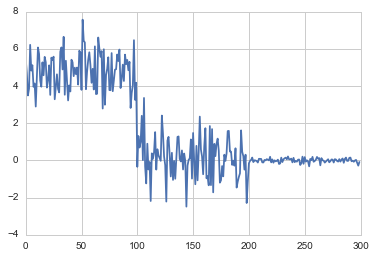

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # nicer plots
sns.set_style('whitegrid')      # plot styling
import numpy as np

np.random.seed(123456)
data = np.random.randn(300)
data[:100] += 5
data[200:] /= 10

plt.plot(data)

In [94]:
# prepare online-study
S = bl.OnlineStudy(storeHistory=True) # for later plotting, past results need to be stored
S.setObservationModel(bl.om.Gaussian())
S.setGrid([[-10, 10, 400], [0, 2, 400]])

# set model hierarchy
S.addTransitionModel(bl.tm.Static())
S.addTransitionModel(bl.tm.Independent())

S.setTransitionModelPrior([0.999, 0.001])

# loop over all data points
for d in tqdm(data):
    S.step(d)

+ Created new study.
  --> Online study
+ Observation model: Gaussian observations. Parameter(s): ['mean', 'standard deviation']
+ Boundaries: [[-10, 10], [0, 2]]
+ Grid size: [400, 400]
    + Added transition model: Static/constant parameter values (no hyper-parameters)
    + Added transition model: Independent observations model (no hyper-parameters)


  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

    + Initialized flat hyper-prior.
    + Initialized prior.
    + Initialized normalization factors.


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.12it/s]


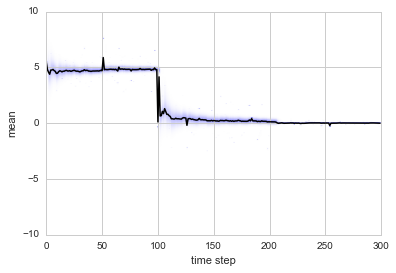

In [95]:
S.plotParameterEvolution(0)

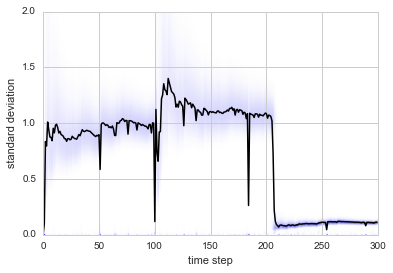

In [96]:
S.plotParameterEvolution(1)

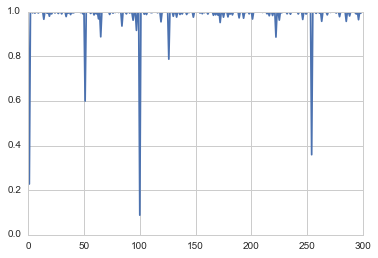

In [97]:
plt.plot(S.getTransitionModelDistributions()[:, 0])

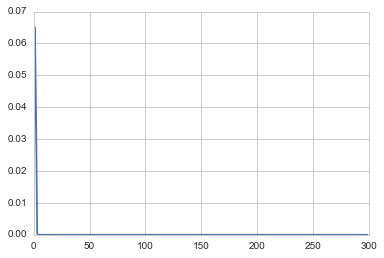

In [83]:
cumprob = np.cumprod(S.getTransitionModelDistributions(), axis=0)
cumprob /= np.sum(cumprob, axis=1)[:, None]
plt.plot(cumprob[:, 1])